In [1]:
# Load data
from sklearn.datasets import load_wine
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

d = load_wine()
x = d['data']
y = d['target']

y[y==2] = 1

x = np.random.randn(100,2)*1+[3,5]
x = np.concatenate([x, np.random.randn(100,2)*1+[-6, 5]])
y=np.concatenate([np.zeros(100),np.ones(100)])

m, n = x.shape

y[y==0]=-1


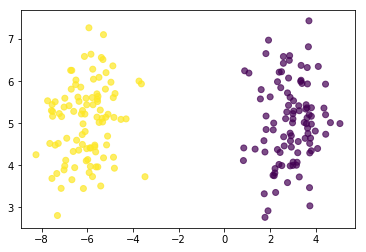

In [2]:
plt.scatter(x[:,0], x[:,1], c=y, alpha=0.7)

In [3]:
# Linear program SVM
# Linear programming support vector machines
# Weida Zhou∗, Li Zhang, Licheng Jiao

In [30]:
from scipy.optimize import linprog
class lp_svm():
    def __init__(self):
        pass
    
    def get_mats(self, x, y, lamb):
        m, n = x.shape
        f = np.squeeze(np.concatenate([np.zeros((n,1)), np.ones((n,1)), lamb*np.ones((m,1)), [[0]]]))
        main_constraints = np.concatenate([np.diag(-y).dot(x), np.zeros((m,n)), -np.eye(m), -y.reshape((-1,1))], axis=1)
        w_less_t = np.concatenate([np.eye(n),-np.eye(n), np.zeros((n,m)), np.zeros((n,1))], axis=1)
        minus_w_less_t = np.concatenate([-np.eye(n),-np.eye(n), np.zeros((n,m)), np.zeros((n,1))], axis=1)

        A = np.concatenate([main_constraints, w_less_t, minus_w_less_t])
        b = np.squeeze(np.concatenate([-np.ones((m,1)), np.zeros((2*n,1))]))

        bounds = np.zeros((2, 2*n+1+m))
        bounds[0,:] = np.concatenate([n*[-np.inf], n*[-np.inf], m*[0], [-np.inf]])
        bounds[1,:] = np.concatenate([n*[np.inf], n*[np.inf], m*[np.inf], [np.inf]])    
        bounds = tuple(map(tuple, bounds.T))
         
        return f, A, b, bounds
    
    def fit(self, x, y, lamb=0.5, p_w=np.empty(0)):
        c, A, b, bounds = self.get_mats(x, y, lamb)
        res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, options=dict(tol=1e-8))
        m, n = x.shape
        self.w = res.x[0:n]
        self.b = res.x[-1]
        self.A = A
        self.c = c
        self.epsilons = res.x[n+1:-1]
        self.r = res.x[n]
        self.res = res
    
    def predict(self, x):
        return 2*(x.dot(self.w)+self.b>0)-1

In [31]:
l = lp_svm()
l.fit(x, y, lamb=.1)
l.predict(x)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

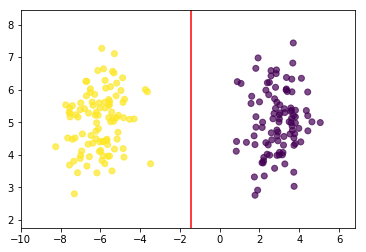

In [38]:
m, n = x.shape
w = l.w+0.00000000001
b = l.b

x_p = np.linspace(min(x[:,0])-1,max(x[:,0])+1,100)
y_p = (-x_p*w[0]-b)/w[1]

plt.scatter(x[:,0], x[:,1], c=y, alpha=0.7)
plt.plot(x_p, y_p, '-r')
plt.ylim([min(x[:,1])-1, max(x[:,1])+1])
plt.show()

In [7]:
l.A.dot(l.res.x)

array([-8.51635031e-01, -3.35976707e+00, -1.79174042e+00, -5.36898328e-01,
       -3.12497802e+00, -2.18511103e-01, -2.26106555e+00, -3.29665241e+00,
       -4.88498131e-15, -2.58476909e+00, -1.60936954e-01, -3.00317950e+00,
       -2.70265218e-01, -1.83730607e+00, -4.11301669e-01, -1.03631204e+00,
       -3.12675193e+00, -2.76285838e-01, -3.98679151e+00, -1.33226763e-15,
       -8.70703521e-01, -8.75795469e-01, -1.81216373e+00, -2.76027820e+00,
       -8.37115456e-01, -8.22327787e-01, -1.36425451e+00, -1.54884239e+00,
       -2.96639138e+00, -1.12950829e+00, -1.50784240e+00, -4.04138720e+00,
       -1.81306150e+00, -8.12497511e-01, -7.10542736e-15, -1.44635507e+00,
       -3.11399119e+00, -2.46654061e+00, -1.69331424e+00, -2.58504038e+00,
       -7.91368553e-01, -1.15772358e+00, -2.58883514e+00, -3.16617336e+00,
       -4.45181021e-01, -2.01821112e+00, -1.54977859e+00, -3.09994520e+00,
       -1.51463128e+00, -7.27741493e-01, -3.02079302e+00, -1.02140518e-14,
       -2.06843471e+00, -